In [1]:
from pathlib import Path
import statistics

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_path = Path().resolve().parent / 'imgs' / 'crooked.JPG'
img_path.is_file()

True

In [3]:
def img_import(file_path: str) -> tuple:
    #OpenCV uses BGR not RGB
    img = cv.imread(str(img_path), 1)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return (img, img_gray)
    
def img_show(img: np.ndarray) -> None:
    plt.figure(figsize=(20,10))
    if len(img.shape) == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img[...,::-1])

def get_contours(img: np.ndarray) -> np.ndarray:
    if len(img.shape) > 2:
        raise ValueError('Length of img.shape is greater than 2.\nImage must be a 2D numpy.ndarray.\nTry converting to grayscale?')
    
    ret, thresh = cv.threshold(img, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours, hierarchy

def get_photo_contour(contours: tuple, hierarchy: np.ndarray) -> np.ndarray:
    photos = []
    for idx, val in enumerate(hierarchy[0]):
        _next, _prev, _child, _parent = val
        if _next == -1 and _parent == 0 and _child != -1:
            photos.append(contours[idx])
            
    # TODO - Add code to handle if there are multiple photos in a single img/scan
    if len(photos) > 1:
        print('photos length is greater than 1.... possibly more than one photo? multiple photos code not implimented yet')
        return
    else:
        return photos
    
def get_photo_boundies(photo_contour: np.ndarray):
    rect = cv.minAreaRect(photo_contour[0])
    angle = rect[-1]
    print(angle)
    box = np.int0(cv.boxPoints(rect))
    return box

In [4]:
img, img_gray = img_import(img_path)

print(len(img.shape), img_gray.shape)

3 (3231, 2480)


In [5]:
contours, hierarchy = get_contours(img_gray)
photo = get_photo_contour(contours, hierarchy)

9.21310043334961


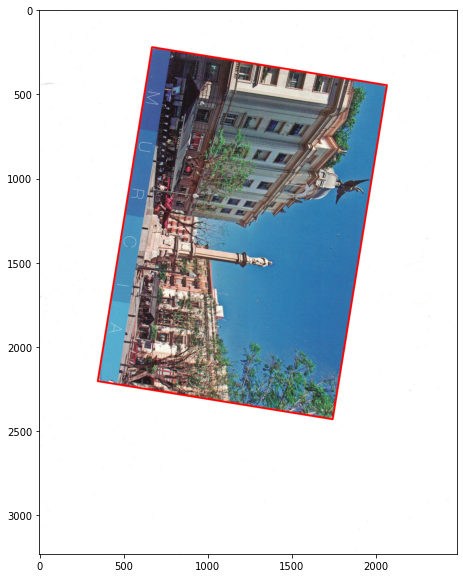

In [6]:
cv.drawContours(img, [get_photo_boundies(photo)], 0, (0,0,255),10);
img_show(img)